In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
consumer_complaints = pd.read_csv("complaints_dec_2014.csv")

In [4]:
cc1 = consumer_complaints

In [5]:
cc2 = consumer_complaints.groupby("Product").count()
cc2["Number of Complaints"] = cc2.pop("Complaint ID")
cc2["Number of Complaints"].head()

Product
Bank account or service    1136
Consumer loan               578
Credit card                1100
Credit reporting           2113
Debt collection            2942
Name: Number of Complaints, dtype: int64

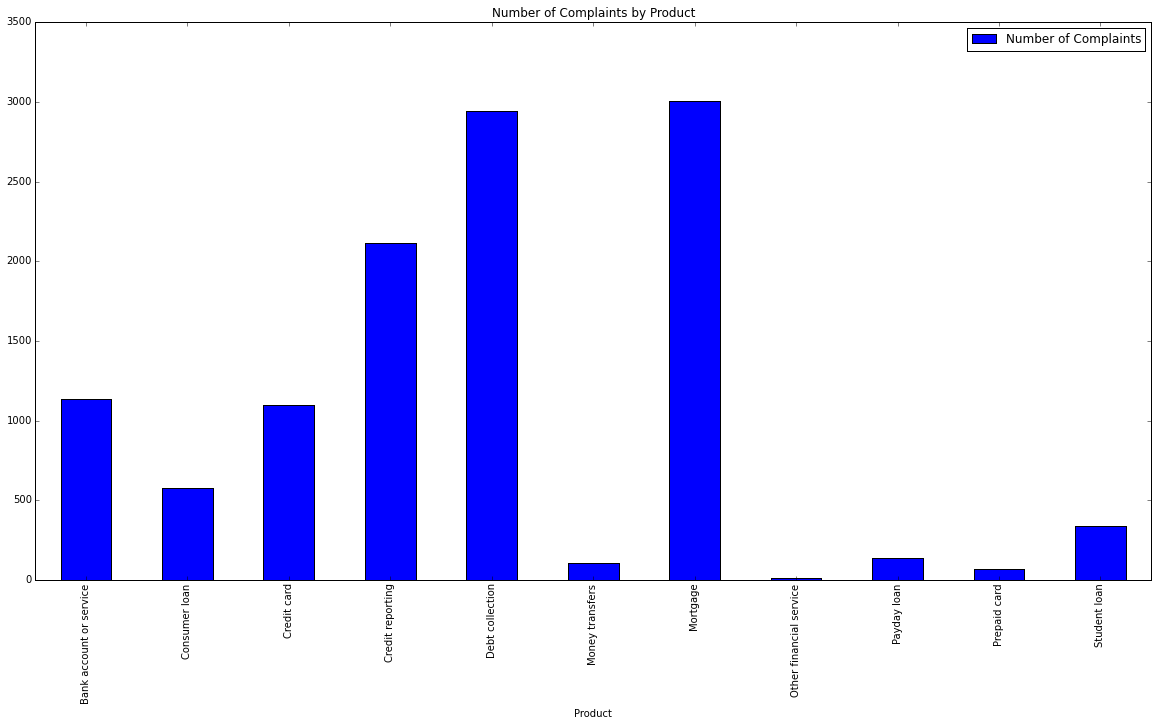

In [6]:
cc2.plot(y="Number of Complaints", kind='bar', title="Number of Complaints by Product", figsize=(20, 10))
plt.show()

Looking at this graph, Debt Collection and Morgatges seem to be the products to receive the most complaints.  This seems about right to me, as these are two pretty sensetive matters.  

In [13]:
cc2 = consumer_complaints.groupby("Company").count()
cc2["Number of Complaints"] = cc2.pop("Complaint ID")

In [16]:
cc3 = cc2["Number of Complaints"].order(ascending = False)

In [18]:
cc3 = cc3[0:9]

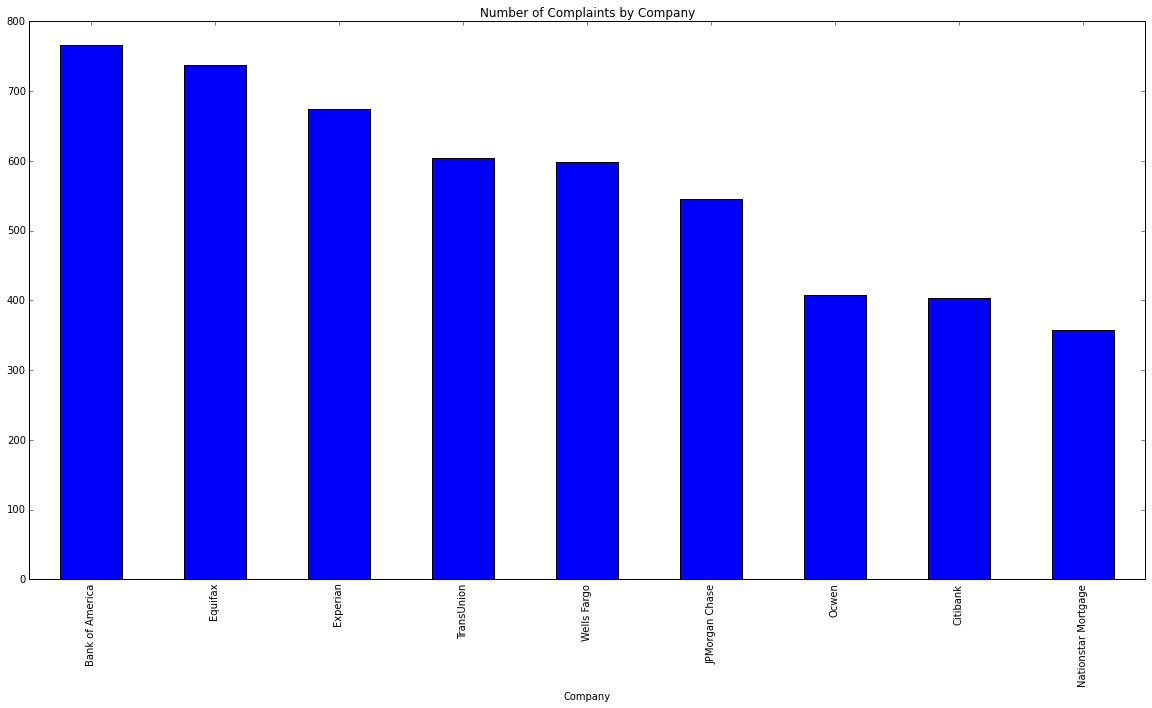

In [20]:
cc3.plot(kind='bar', title="Number of Complaints by Company", figsize=(20, 10))
plt.show()

This is the graph of the top 10 companies receiving the most complaints.  These are all large companies, so again, this seems about right.  The more customers a company has, the more opportunity for complaints.  

In [21]:
cc4 = consumer_complaints.groupby("Company response").count()
cc4["Number of Complaints"] = cc4.pop("Complaint ID")

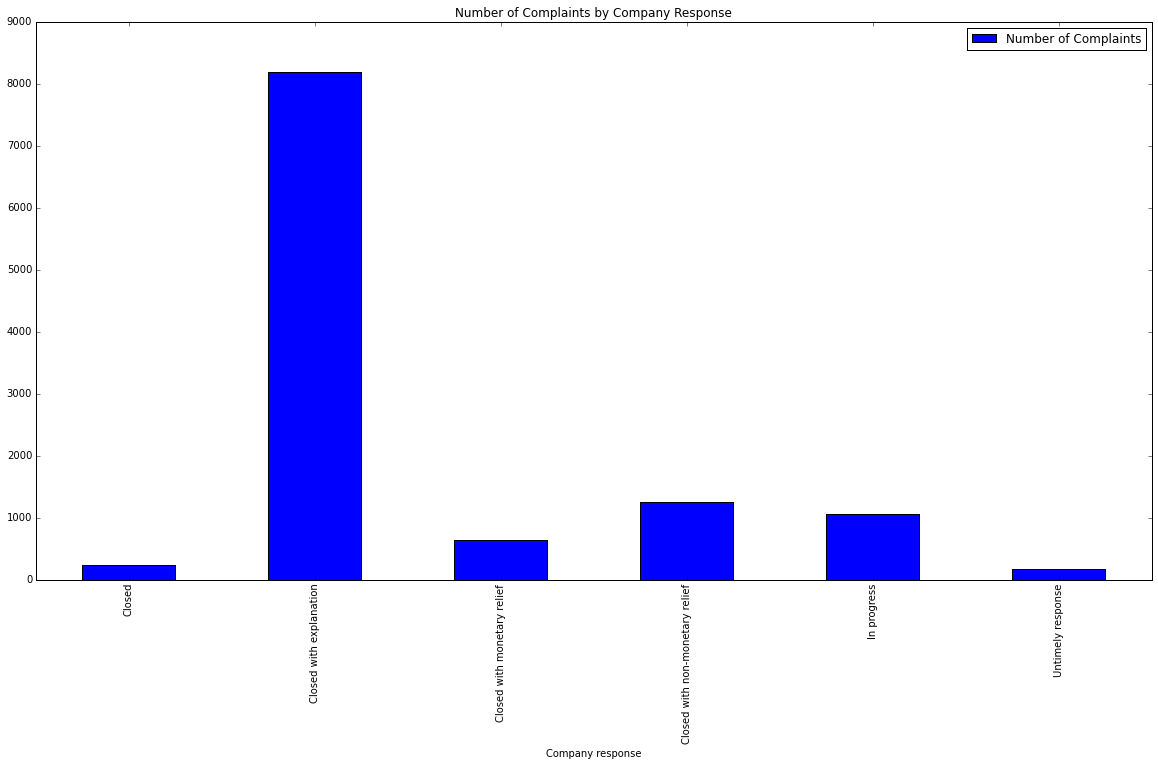

In [22]:
cc4.plot(y="Number of Complaints", kind='bar', title="Number of Complaints by Company Response", figsize=(20, 10))
plt.show()

This graph, again, seems to be accurate to me.  Most companies I have experience with, when I've had to complain, I got some sort of explanation.  Rarely have I received some kind of monetary releif, and I have rarely not received some kind of explanation.  Also, most of the complaints I have made have received a response in a timely manner.  This graph accurately represents my experiences while making complaints.

In [41]:
cc5 = consumer_complaints

In [42]:
temp = pd.DatetimeIndex(cc5['Date received'])
cc5['Date received'] = temp.weekday
cc5["Sub-product"] = cc5["Date received"].value_counts()
cc5["Number of Complaints"] = cc5.pop('Sub-product')
cc5["Mean complaints per day of week"] = cc5["Number of Complaints"] / 7

In [43]:
cc5.groupby("Date received")
cc5 = cc5[0:7]
cc5

,Complaint ID,Product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,Number of Complaints,Mean complaints per day of week
0,1177167,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2544,363.428571
1,1177166,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2580,368.571429
2,1177165,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2289,327.000000
3,1177164,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,1634,233.428571
4,1177163,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,1446,206.571429
5,1177162,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN,543,77.571429
6,1177154,Credit card,Billing disputes,NaN,GA,31322,Web,2,01/07/2015,Amex,Closed with explanation,Yes,NaN,507,72.428571


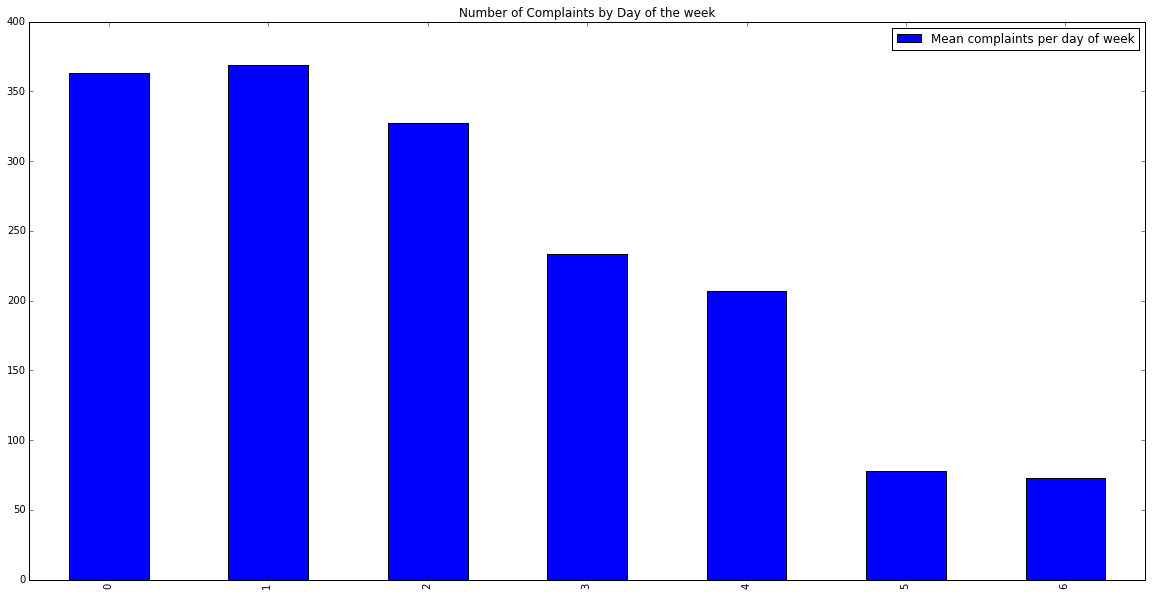

In [48]:
cc5.plot(y="Mean complaints per day of week", kind='bar', title="Number of Complaints by Day of the week", figsize=(20,10))
plt.show()

This graph, to me, seems extremely accurate.  Most people I know tend to business maters during the week, which is shown here.  Also, any complaints derived during the weekend are usually reported on Monday's or Tuesday's.  Also, from previous experiences i